<a href="https://colab.research.google.com/github/kuroitenshi9/nonsense/blob/master/RiPO_L6_58442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ZMSI_Lab_6**
Analiza porównawcza modeli pretrenowanych i ich wersji douczonych na modelach YOLOv8

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia proszę opatrzyć komentarzem;

3- wnioski, pod zadaniem, wpisujemy w polu tekstowym.

In [ ]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Ewa Bielawska
Podaj numer albumu: 58442


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
punkty = []
max = int(50)

Modele dostarczane przez twórców (np. Ultralytics dla YOLOv8) są zazwyczaj oznaczane jako:

*   yolov8n.pt — najmniejszy model ("nano")
*   yolov8s.pt — model mały ("small")
*   yolov8m.pt — model średni ("medium")
*   yolov8l.pt — model duży ("large")
*   yolov8x.pt — model bardzo duży ("extra-large").



### **Zad 9.1.** Przygotuj środowisko Colaboratory do trenowania modelu YOLO 8.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 45832, done.
remote: Counting objects: 100% (731/731), done.
remote: Compressing objects: 100% (434/434), done.
remote: Total 45832 (delta 583), reused 305 (delta 297), pack-reused 45101 (from 5)
Receiving objects: 100% (45832/45832), 39.13 MiB | 22.61 MiB/s, done.
Resolving deltas: 100% (33934/33934), done.


In [ ]:
import os
print('Obecny katalog:', os.getcwd())

Obecny katalog: /content/ultralytics


In [ ]:
os.chdir('/content/ultralytics')
print('Obecny katalog:', os.getcwd())

Obecny katalog: /content/ultralytics


In [ ]:
!pip install -qe .

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done


In [ ]:
from ultralytics import utils, YOLO
from matplotlib import pyplot as plt
from matplotlib import image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
yolo_detect=YOLO('yolov8n.pt')
results_detect=yolo_detect('/content/drive/MyDrive/RiPO/L5-6/image.jpg', conf=0.25, iou=0.7)
results_detect[0].save(filename='Obraz_detect.jpg')

100%|██████████| 6.25M/6.25M [00:00<00:00, 80.1MB/s]



image 1/1 /content/drive/MyDrive/RiPO/L5-6/image.jpg: 480x640 2 cats, 2 dogs, 62.0ms
Speed: 15.7ms preprocess, 62.0ms inference, 1123.4ms postprocess per image at shape (1, 3, 480, 640)


'Obraz_detect.jpg'

In [ ]:
#funkcja do wyświetlania obrazków
import matplotlib.pyplot as plt
import cv2
from PIL import Image

def show_image(image_path):
        image = Image.open(image_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

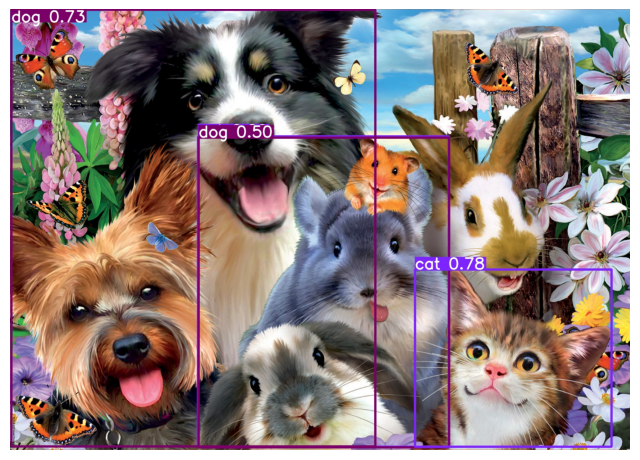

In [ ]:
show_image('/content/ultralytics/Obraz_detect.jpg')

In [ ]:
for result in results_detect:
  for box in result.boxes:
    class_id=box.cls.item()
    confidence = box.conf.item()
    bbox = box.xyxy.cpu().numpy()

    print(f'Class ID: {result.names[int(class_id)]}, Confidence: {confidence:.2f}, Bounding Box: {bbox}')

Class ID: cat, Confidence: 0.78, Bounding Box: [[     1306.8      839.53      1940.1      1410.3]]
Class ID: dog, Confidence: 0.73, Bounding Box: [[     4.0597      2.6355      1178.1      1409.8]]
Class ID: dog, Confidence: 0.50, Bounding Box: [[     608.84      414.75      1416.7      1412.6]]
Class ID: cat, Confidence: 0.29, Bounding Box: [[     606.91      410.25      1415.4      1410.4]]


In [ ]:
# Maksymalna wartość punktów za Zad 9.1: 5
punkty.append(5)

### **Zad 9.2.** Z serwisu Roboflow pobierz przygotowany zbiór do detekcji i lokalizacji obrazów i na podzbiorze **dataset/test** wygeneruj statystyki klasyfikacyjne dla pretrenowanego modelu YOLOv8.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B0PgHEZmt0Cg6ttyr0L5")
project = rf.workspace("ripol05").project("ripo-l5-nijz1")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RiPO-L5-1 in yolov8:: 100%|██████████| 92/92 [00:00<00:00, 5378.81it/s]


In [ ]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 130MB/s] 


In [ ]:
class_names = project.classes
indexed_class_names = {i: name for i, name in enumerate(class_names)}  # Indeksowanie klas od 0

data_yaml = f"""
path: {dataset.location}
test: test/images
train: train/images
val: valid/images
nc: {len(indexed_class_names)}
names: {indexed_class_names}
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

# Walidacja modelu na zbiorze testowym
results = model.val(data="data.yaml")
print(results)


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]
val: Scanning /content/ultralytics/RiPO-L5-1/valid/labels... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 3312.38it/s]

val: New cache created: /content/ultralytics/RiPO-L5-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 11. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


                   all          8         11     0.0926      0.292     0.0949     0.0686
                person          5          8     0.0185       0.25     0.0787     0.0483
               bicycle          3          3      0.167      0.333      0.111     0.0889
Speed: 0.2ms preprocess, 19.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6f0250e470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.01801

In [ ]:
# Maksymalna wartość punktów za Zad 9.2: 10
punkty.append(10)

### **Zad 9.3.** Dotrenuj model YOLO w wersji 8 dla zadania detekcji i lokalizacji obiektów na pobrabranych z Roboflow danych

In [ ]:
results = model.train(
    data="data.yaml",
    epochs=20,
    batch=32,
    imgsz=640,               # 640x640 standardowe dla YOLO
    device="cpu"
)

results.save()

NameError: name 'model' is not defined

In [ ]:
# Maksymalna wartość punktów za Zad 9.3: 10
punkty.append(10)

### **Zad 9.4.** Analogicznie dotrenuj model YOLO w wersji 8 dla jednego z pozostałych zadań rozpoznawania obiektów na pobrabranych z Roboflow danych

In [ ]:
# Maksymalna wartość punktów za Zad 9.4: 20
punkty.append(20)

### **Zad 9.5.** Pliki z metrykami procesów uczenia, walidacji i testowania przekopiuj do osobnej struktury katalogów, skompresuj, nadaj mu nazwę *ZMSI_L9_Album.zip* i umieść razem z notatnikiem w chmurze.

In [ ]:
# Maksymalna wartość punktów za Zad 9.5: 5
punkty.append(5)

In [ ]:
razem = sum(punkty)
razem_pr = razem/max
if razem_pr >= 0.90:
  ocena = 5
elif razem_pr >= 0.80:
  ocena = 4.5
elif razem_pr >= 0.70:
  ocena = 4
elif razem_pr >= 0.60:
  ocena = 3.5
elif razem_pr >= 0.50:
  ocena = 3
else:
  ocena = 2

print("Punktacja za kolejne zadania: ", punkty)
print("Suma punktów: ", razem)
print("Udział procentowy: ", razem_pr*100, "%")
print("Ocena: ", ocena)

Punktacja za kolejne zadania:  [5, 10, 10, 20, 5]
Suma punktów:  50
Udział procentowy:  100.0 %
Ocena:  5
